In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from PhysPropWater import rho
from sklearn.metrics import mean_absolute_error

c:\Users\olofs\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


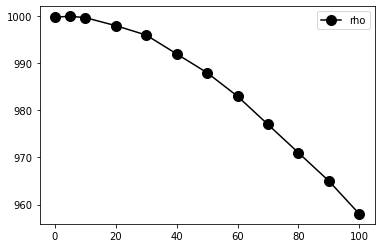

In [4]:
# Create two vectors
x = rho[:,0]
y = rho[:,1]
X = np.array([x]).T # make a N x 2 matrix
# Plot the data once
plt.plot(x, y, '-ko', label='rho', markersize=10)
colors = ['g','k','pink','r'] # Plot with different colors
plt.legend()

========== depth = 1 ============
|--- feature_0 <= 65.00
|   |--- value: [994.56]
|--- feature_0 >  65.00
|   |--- value: [967.75]

========== depth = 2 ============
|--- feature_0 <= 65.00
|   |--- feature_0 <= 35.00
|   |   |--- value: [998.70]
|   |--- feature_0 >  35.00
|   |   |--- value: [987.67]
|--- feature_0 >  65.00
|   |--- feature_0 <= 85.00
|   |   |--- value: [974.00]
|   |--- feature_0 >  85.00
|   |   |--- value: [961.50]

========== depth = 3 ============
|--- feature_0 <= 65.00
|   |--- feature_0 <= 35.00
|   |   |--- feature_0 <= 15.00
|   |   |   |--- value: [999.83]
|   |   |--- feature_0 >  15.00
|   |   |   |--- value: [997.00]
|   |--- feature_0 >  35.00
|   |   |--- feature_0 <= 55.00
|   |   |   |--- value: [990.00]
|   |   |--- feature_0 >  55.00
|   |   |   |--- value: [983.00]
|--- feature_0 >  65.00
|   |--- feature_0 <= 85.00
|   |   |--- feature_0 <= 75.00
|   |   |   |--- value: [977.00]
|   |   |--- feature_0 >  75.00
|   |   |   |--- value: [971.00]


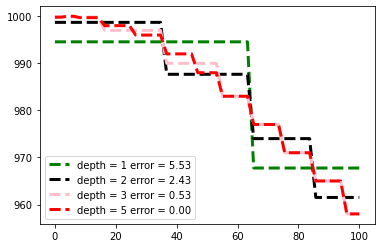

In [3]:
# Loop over different depths
for i, depth in enumerate([1,2,3,5]):
    # Make a regressor model and fit
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)
    # Get the predicted y at x to calculate the error
    y_pred = model.predict(X)
    error = mean_absolute_error(y_pred, y)
    # Create a finely gridded line
    x_fine = np.linspace(np.min(x), np.max(x), 50)
    x_fine = np.array([x_fine]).T # Transform x_fine from N to Nx1
    y_fine = model.predict(x_fine)
    plt.plot(x_fine, y_fine, color=colors[i],
    linestyle='--', linewidth=3,
    label=f'{depth = } {error = :.2f}')
    print(f'========== {depth = } ============')
    text_representation = tree.export_text(model)
    print(f"text rep: {text_representation}")
plt.legend()
